In [1]:
import numpy as np
import alf.io
from brainbox.processing import bincount2D
import matplotlib.pyplot as plt
import ibllib.plots as iblplt
from oneibl.one import ONE
from pathlib import Path

In [2]:
def add_stim_off_times(trials):
    on = 'stimOn_times'
    off = 'stimOff_times'
    trials[off] = np.zeros(shape=trials[on].shape)
    correct_trials = trials['feedbackType'] == 1
    u = trials['feedback_times'][correct_trials] + 1.0
    trials[off][correct_trials] = u
    error_trials = trials['feedbackType'] == -1
    v = trials['feedback_times'][error_trials] + 2.0
    trials[off][error_trials] = v


def plot_trial(trial_number, R, times):
    '''
    Plot a rasterplot for a given trial,
    ordered by insertion depth, with
    'stimOn_times','feedback_times' and 'stimOff_times'
    '''

    a = list(trial_numbers)
    first = a.index(trial_number)
    last = len(a) - 1 - a[::-1].index(trial_number)

    plt.imshow(R[:, first:last], aspect='auto',
               cmap='binary', vmax=T_BIN / 0.001 / 4,
               extent=np.r_[times[[first, last]],
               Clusters[[0, -1]]], origin='lower')

    def restrict_timestamplist(q):

        li = []
        for i in q:
            if i > times[first] and i < times[last]:
                li.append(i)
        return li

    iblplt.vertical_lines(restrict_timestamplist(
        trials['stimOn_times']), ymin=0, ymax=Clusters[-1],
        color='m', linewidth=0.5, label='stimOn_times')

    iblplt.vertical_lines(restrict_timestamplist(
        trials['feedback_times']), ymin=0, ymax=Clusters[-1],
        color='b', linewidth=0.5, label='feedback_times')

    iblplt.vertical_lines(restrict_timestamplist(
        trials['stimOff_times']), ymin=0, ymax=Clusters[-1],
        color='g', linewidth=0.5, label='stimOff_times')

    plt.xlabel('Time (s)')
    plt.ylabel('Cluster #; ordered by depth')
    plt.title('Trial number %s' % trial_number)
    plt.legend()
    plt.tight_layout()

In [3]:
    one = ONE()
    eid = one.search(subject='ZM_1735', date='2019-08-01', number=1)
    D = one.load(eid[0], clobber=False, download_only=True)
    alf_path = Path(D.local_path[0]).parent
    
    

Connected to https://alyx.internationalbrainlab.org as michael.schartner


2019-11-12 11:53:10.85 INFO     [webclient.py:81] Downloading: /home/mic/Downloads/FlatIron/mainenlab/Subjects/ZM_1735/2019-08-01/001/alf/_ibl_trials.contrastRight.6be7c60b-6393-4414-ac91-6943f323e537.npy Bytes: 3256


2019-11-12 11:53:10.482 INFO     [webclient.py:81] Downloading: /home/mic/Downloads/FlatIron/mainenlab/Subjects/ZM_1735/2019-08-01/001/alf/_ibl_trials.probabilityLeft.69501ea1-d674-41ed-b73d-544ae25f4193.npy Bytes: 3256


2019-11-12 11:53:10.876 INFO     [webclient.py:81] Downloading: /home/mic/Downloads/FlatIron/mainenlab/Subjects/ZM_1735/2019-08-01/001/alf/_ibl_trials.feedbackType.e1c01ab1-f98c-4bc1-a903-0b799b725511.npy Bytes: 3256


2019-11-12 11:53:11.269 INFO     [webclient.py:81] Downloading: /home/mic/Downloads/FlatIron/mainenlab/Subjects/ZM_1735/2019-08-01/001/alf/_ibl_trials.itiDuration.46d7ccfb-08be-43bb-bcae-e88d92ce42b4.npy Bytes: 3256


2019-11-12 11:53:11.659 INFO     [webclient.py:81] Downloading: /home/mic/Downloads/FlatIron/mainenlab/Subjects/ZM_1735/2019-08-01/001/alf/_ibl_trials.rewardVolume.010c7e84-023b-49ff-bd3f-34c1e6cc2ea8.npy Bytes: 3256


2019-11-12 11:53:12.48 INFO     [webclient.py:81] Downloading: /home/mic/Downloads/FlatIron/mainenlab/Subjects/ZM_1735/2019-08-01/001/alf/_ibl_trials.choice.8154f710-7313-4e4a-a501-f6945417802d.npy Bytes: 3256


2019-11-12 11:53:12.435 INFO     [webclient.py:81] Downloading: /home/mic/Downloads/FlatIron/mainenlab/Subjects/ZM_1735/2019-08-01/001/alf/_ibl_trials.contrastLeft.0eec56d7-826d-41b0-83f2-badbe70817f0.npy Bytes: 3256


2019-11-12 11:53:12.821 INFO     [webclient.py:81] Downloading: /home/mic/Downloads/FlatIron/mainenlab/Subjects/ZM_1735/2019-08-01/001/alf/_ibl_trials.goCue_times.1db39854-565d-490b-8b0e-787063825a9a.npy Bytes: 3256


2019-11-12 11:53:13.215 INFO     [webclient.py:81] Downloading: /home/mic/Downloads/FlatIron/mainenlab/Subjects/ZM_1735/2019-08-01/001/alf/_ibl_trials.goCueTrigger_times.5b1aa3b8-87d8-413e-adb6-cfec22569a55.npy Bytes: 3256


2019-11-12 11:53:13.603 INFO     [webclient.py:81] Downloading: /home/mic/Downloads/FlatIron/mainenlab/Subjects/ZM_1735/2019-08-01/001/alf/clusters.peakChannel.14692377-7f2a-4816-ac05-907e9dcc8271.npy Bytes: 2744


2019-11-12 11:53:13.990 INFO     [webclient.py:81] Downloading: /home/mic/Downloads/FlatIron/mainenlab/Subjects/ZM_1735/2019-08-01/001/alf/channels.rawRow.3f718ebd-8e3a-4d2d-ad4c-ad5e6b16b268.npy Bytes: 1624


2019-11-12 11:53:14.376 INFO     [webclient.py:81] Downloading: /home/mic/Downloads/FlatIron/mainenlab/Subjects/ZM_1735/2019-08-01/001/alf/clusters.waveformDuration.c1a6bf64-b118-402c-b9f8-cad687fc71d7.npy Bytes: 855560


2019-11-12 11:53:15.247 INFO     [webclient.py:81] Downloading: /home/mic/Downloads/FlatIron/mainenlab/Subjects/ZM_1735/2019-08-01/001/alf/clusters.depths.425864c1-0d57-44ea-ad32-084a4ac343c3.npy Bytes: 2744


2019-11-12 11:53:15.649 INFO     [webclient.py:81] Downloading: /home/mic/Downloads/FlatIron/mainenlab/Subjects/ZM_1735/2019-08-01/001/alf/spikes.times.3e051033-4057-4249-8242-b75469bed24c.npy Bytes: 56330744


2019-11-12 11:53:18.390 INFO     [webclient.py:81] Downloading: /home/mic/Downloads/FlatIron/mainenlab/Subjects/ZM_1735/2019-08-01/001/alf/spikes.depths.1474b6de-ec05-4150-b811-936dee7fac66.npy Bytes: 56330744


2019-11-12 11:53:21.129 INFO     [webclient.py:81] Downloading: /home/mic/Downloads/FlatIron/mainenlab/Subjects/ZM_1735/2019-08-01/001/alf/spikes.amps.51e7699b-fcfe-42d2-9d6d-1add04c7416f.npy Bytes: 56330744


2019-11-12 11:53:23.855 INFO     [webclient.py:81] Downloading: /home/mic/Downloads/FlatIron/mainenlab/Subjects/ZM_1735/2019-08-01/001/alf/spikes.clusters.0ce05fe2-a11f-42cf-ae08-4d00e77274ed.npy Bytes: 28165436


2019-11-12 11:53:25.719 INFO     [webclient.py:81] Downloading: /home/mic/Downloads/FlatIron/mainenlab/Subjects/ZM_1735/2019-08-01/001/alf/channels.sitePositions.7d568741-953d-4946-8994-d3565a932db7.npy Bytes: 6064


2019-11-12 11:53:26.110 INFO     [webclient.py:81] Downloading: /home/mic/Downloads/FlatIron/mainenlab/Subjects/ZM_1735/2019-08-01/001/alf/clusters.amps.432a7ca0-b483-48a5-b0b7-e1c0a1d7defa.tsv Bytes: 3772


2019-11-12 11:53:26.499 INFO     [webclient.py:81] Downloading: /home/mic/Downloads/FlatIron/mainenlab/Subjects/ZM_1735/2019-08-01/001/alf/_ibl_wheel.times.99faaba8-46b7-4a76-b0cc-52f393c34ede.npy Bytes: 2823400


2019-11-12 11:53:27.562 INFO     [webclient.py:81] Downloading: /home/mic/Downloads/FlatIron/mainenlab/Subjects/ZM_1735/2019-08-01/001/alf/_ibl_wheel.velocity.58d9f0f0-9652-4712-baa7-eabfe4a54d43.npy Bytes: 2823400


2019-11-12 11:53:28.633 INFO     [webclient.py:81] Downloading: /home/mic/Downloads/FlatIron/mainenlab/Subjects/ZM_1735/2019-08-01/001/alf/_ibl_trials.intervals.9a048cba-90ef-42eb-8a8f-d5d2b1b88e5f.npy Bytes: 6384


2019-11-12 11:53:29.21 INFO     [webclient.py:81] Downloading: /home/mic/Downloads/FlatIron/mainenlab/Subjects/ZM_1735/2019-08-01/001/alf/_ibl_leftCamera.times.70e8cac5-7214-4c48-941b-b85e6ad02793.npy Bytes: 660944


2019-11-12 11:53:29.890 INFO     [webclient.py:81] Downloading: /home/mic/Downloads/FlatIron/mainenlab/Subjects/ZM_1735/2019-08-01/001/alf/_ibl_trials.stimOn_times.bc3db2da-aff2-4a4b-8377-84a69c818baa.npy Bytes: 3256


2019-11-12 11:53:30.277 INFO     [webclient.py:81] Downloading: /home/mic/Downloads/FlatIron/mainenlab/Subjects/ZM_1735/2019-08-01/001/alf/_ibl_trials.feedback_times.6da39b9b-11a2-4b97-aa5f-56f02b15d858.npy Bytes: 3256


2019-11-12 11:53:30.665 INFO     [webclient.py:81] Downloading: /home/mic/Downloads/FlatIron/mainenlab/Subjects/ZM_1735/2019-08-01/001/alf/_ibl_trials.response_times.f098655e-603d-43d4-9de6-ff2514e3ce4b.npy Bytes: 3256


2019-11-12 11:53:31.52 INFO     [webclient.py:81] Downloading: /home/mic/Downloads/FlatIron/mainenlab/Subjects/ZM_1735/2019-08-01/001/alf/_ibl_wheel.position.f43f6bd1-eabd-43cf-af6e-b47aff41e29a.npy Bytes: 2823400


In [4]:
    spikes = alf.io.load_object(alf_path, 'spikes')
    clusters = alf.io.load_object(alf_path, 'clusters')
    channels = alf.io.load_object(alf_path, 'channels')
    trials = alf.io.load_object(alf_path, '_ibl_trials')

In [5]:
# Add stim_off_times to trial object
add_stim_off_times(trials)

In [6]:
T_BIN = 0.01  # time bin in sec
# bin spikes
R, times, Clusters = bincount2D(
    spikes['times'], spikes['clusters'], T_BIN)

In [7]:
# get trial number for each time bin
trial_numbers = np.digitize(times, trials['goCue_times'])
print('Range of trials: ', [trial_numbers[0], trial_numbers[-1]])


Range of trials:  [0, 391]


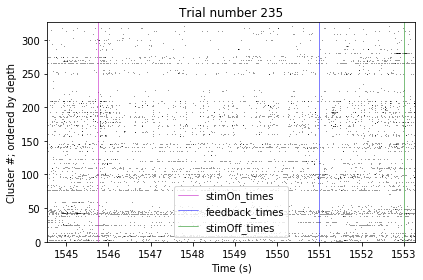

In [8]:
# get a raster plot for a particular trial
plot_trial(235, R, times)
plt.show()